Let's compute $\chi^2$ vs $\beta$ using Pantheon data:

In [ ]:
# import libraries:
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
from getdist import plots
from getdist import MCSamples
import os
import emcee 
import numpy as np
import scipy
import matplotlib.pyplot as plt
import IPython

home_directory = '/home/mleize'
home_directory = '/home/matias'

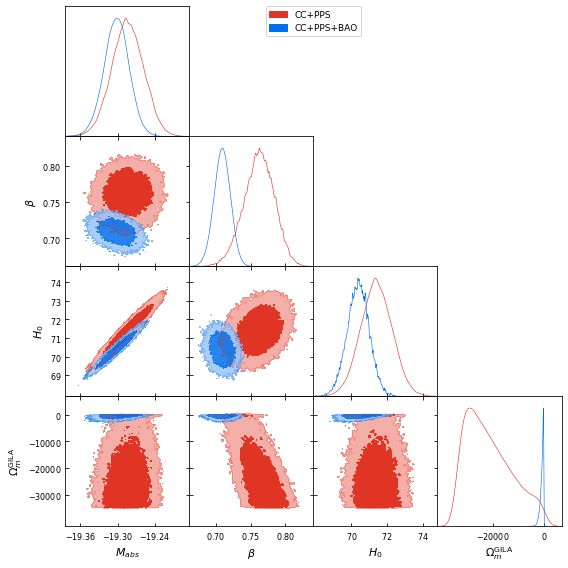

In [2]:
labels = [r'$M_{abs}$',r'$\beta$',r'$H_{0}$',r'$\Omega^{\rm GILA}_m$']
names = [i.replace('$','') for i in labels]; 

filename_1 = home_directory+'/Documents/Repos/GILA-output/L=0.75/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params.h5'
filename_2 = home_directory+'/Documents/Repos/GILA-output/L=0.75/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params.h5'
reader_1 = emcee.backends.HDFBackend(filename_1)
samples_1 = reader_1.get_chain(flat=True, discard=100,thin=1)

reader_2 = emcee.backends.HDFBackend(filename_2)
samples_2 = reader_2.get_chain(flat=True, discard=100,thin=1)

samps_1 = MCSamples(samples = samples_1,names=names,labels=names)
samps_2 = MCSamples(samples = samples_2,names=names,labels=names)

g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=0.75.png')

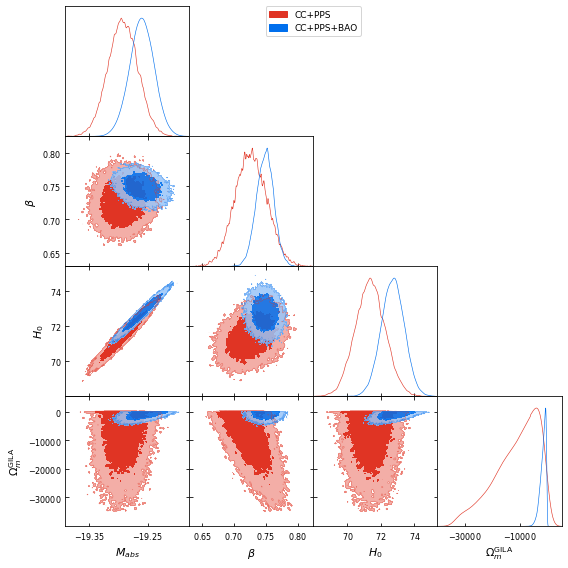

In [3]:
labels = [r'$M_{abs}$',r'$\beta$',r'$H_{0}$',r'$\Omega^{\rm GILA}_m$']
names = [i.replace('$','') for i in labels]; 

filename_1 = home_directory+'/Documents/Repos/GILA-output/L=0.80/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params.h5'
filename_2 = home_directory+'/Documents/Repos/GILA-output/L=0.80/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params.h5'
reader_1 = emcee.backends.HDFBackend(filename_1)
samples_1 = reader_1.get_chain(flat=True, discard=100,thin=1)

reader_2 = emcee.backends.HDFBackend(filename_2)
samples_2 = reader_2.get_chain(flat=True, discard=100,thin=1)

samps_1 = MCSamples(samples = samples_1,names=names,labels=names)
samps_2 = MCSamples(samples = samples_2,names=names,labels=names)

g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=0.80.png')

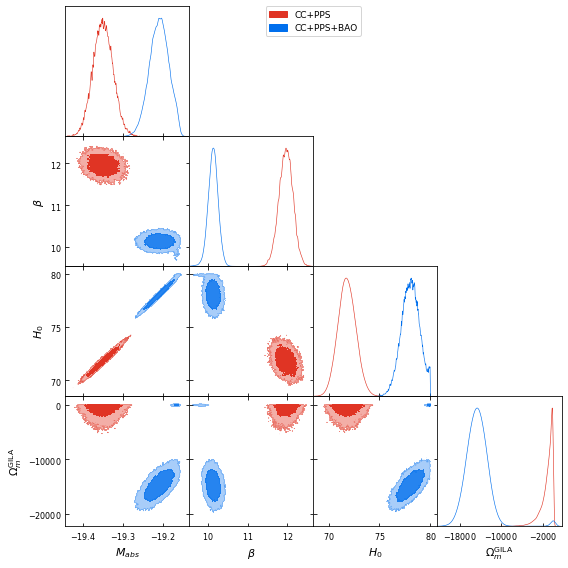

In [4]:
labels = [r'$M_{abs}$',r'$\beta$',r'$H_{0}$',r'$\Omega^{\rm GILA}_m$']
names = [i.replace('$','') for i in labels]; 

filename_1 = home_directory+'/Documents/Repos/GILA-output/L=0.85/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params.h5'
filename_2 = home_directory+'/Documents/Repos/GILA-output/L=0.85/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params.h5'
reader_1 = emcee.backends.HDFBackend(filename_1)
samples_1 = reader_1.get_chain(flat=True, discard=100,thin=1)

reader_2 = emcee.backends.HDFBackend(filename_2)
samples_2 = reader_2.get_chain(flat=True, discard=100,thin=1)

samps_1 = MCSamples(samples = samples_1,names=names,labels=names)
samps_2 = MCSamples(samples = samples_2,names=names,labels=names)

g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=0.85.png')

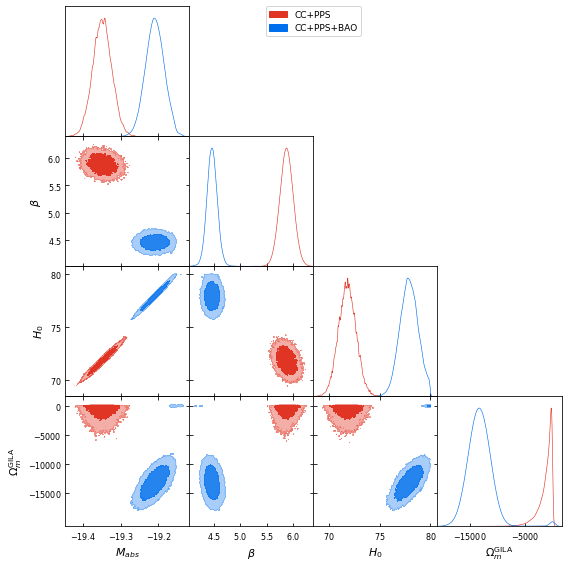

In [5]:
labels = [r'$M_{abs}$',r'$\beta$',r'$H_{0}$',r'$\Omega^{\rm GILA}_m$']
names = [i.replace('$','') for i in labels]; 


filename_1 = home_directory+'/Documents/Repos/GILA-output/L=0.90/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params.h5'
filename_2 = home_directory+'/Documents/Repos/GILA-output/L=0.90/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params.h5'
reader_1 = emcee.backends.HDFBackend(filename_1)
samples_1 = reader_1.get_chain(flat=True, discard=100,thin=1)

reader_2 = emcee.backends.HDFBackend(filename_2)
samples_2 = reader_2.get_chain(flat=True, discard=100,thin=1)

samps_1 = MCSamples(samples = samples_1,names=names,labels=names)
samps_2 = MCSamples(samples = samples_2,names=names,labels=names)
g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=0.90.png')

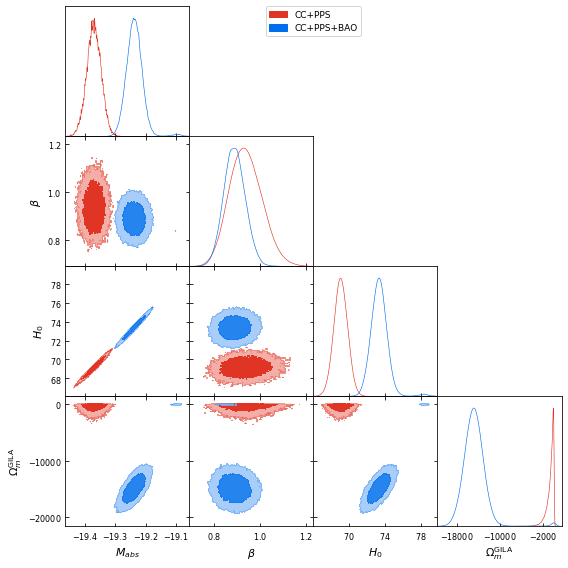

In [6]:
labels = [r'$M_{abs}$',r'$\beta$',r'$H_{0}$',r'$\Omega^{\rm GILA}_m$']
names = [i.replace('$','') for i in labels]; 

filename_1 = home_directory+'/Documents/Repos/GILA-output/L=1.00/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params.h5'
filename_2 = home_directory+'/Documents/Repos/GILA-output/L=1.00/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params.h5'
reader_1 = emcee.backends.HDFBackend(filename_1)
samples_1 = reader_1.get_chain(flat=True, discard=100,thin=1)

reader_2 = emcee.backends.HDFBackend(filename_2)
samples_2 = reader_2.get_chain(flat=True, discard=100,thin=1)

samps_1 = MCSamples(samples = samples_1,names=names,labels=names)
samps_2 = MCSamples(samples = samples_2,names=names,labels=names)

g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=1.00.png')

Here we present the results with $\Omega^{\rm \Lambda CDM}_m$ 

<getdist.mcsamples.MCSamples object at 0x7fd196caf850> <getdist.mcsamples.MCSamples object at 0x7fd196f59950>
<class 'getdist.mcsamples.MCSamples'>


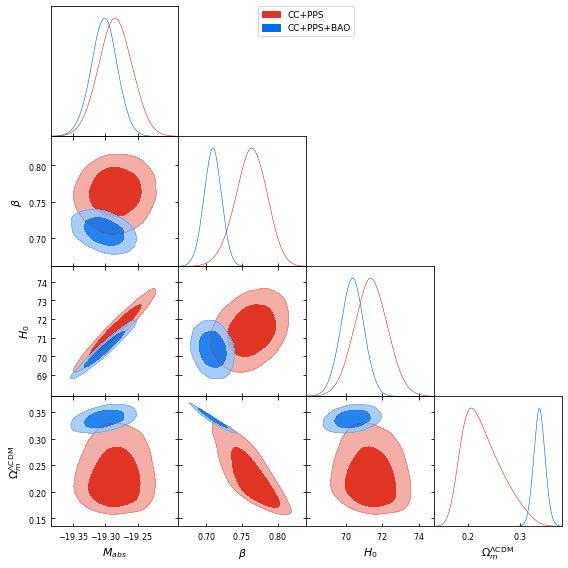

In [7]:
labels = [r'$M_{abs}$',r'$\beta$',r'$H_{0}$',r'$\Omega_m^{\rm \Lambda CDM}$']
names = [i.replace('$','') for i in labels]; 



filename_1 = home_directory+'/Documents/Repos/GILA-output/L=0.75/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params'
filename_2 = home_directory+'/Documents/Repos/GILA-output/L=0.75/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params'

with np.load(filename_1 + '_deriv.npz') as data:
    samples_1 = data['new_samples']

with np.load(filename_2 + '_deriv.npz') as data:
    samples_2 = data['new_samples']

samps_1 = MCSamples(samples = samples_1,names=names,labels=names)
samps_2 = MCSamples(samples = samples_2,names=names,labels=names)

samps_1 = samps_1.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
            settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
            'smooth_scale_1D':0.3})

samps_2 = samps_2.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
            settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
            'smooth_scale_1D':0.3})


print(samps_1, samps_2)
print(type(samps_1))
g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=0.75.pdf')

<getdist.mcsamples.MCSamples object at 0x7fd1943c1a50> <getdist.mcsamples.MCSamples object at 0x7fd19710fa10>
<class 'getdist.mcsamples.MCSamples'>


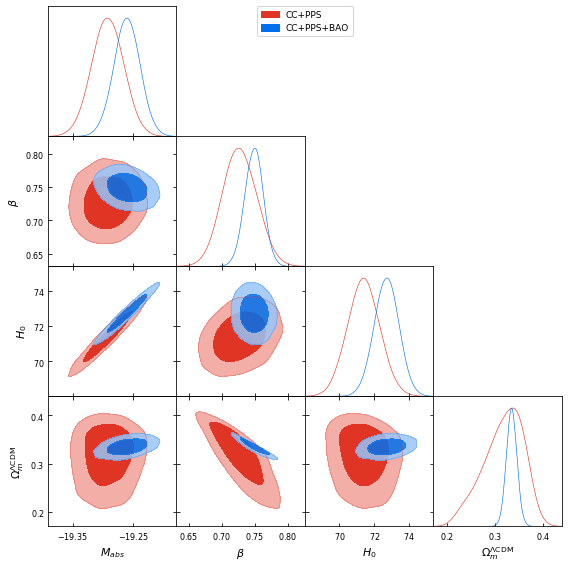

In [8]:
labels = [r'$M_{abs}$',r'$\beta$',r'$H_{0}$',r'$\Omega_m^{\rm \Lambda CDM}$']
names = [i.replace('$','') for i in labels]; 



filename_1 = home_directory+'/Documents/Repos/GILA-output/L=0.80/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params'
filename_2 = home_directory+'/Documents/Repos/GILA-output/L=0.80/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params'

with np.load(filename_1 + '_deriv.npz') as data:
    samples_1 = data['new_samples']

with np.load(filename_2 + '_deriv.npz') as data:
    samples_2 = data['new_samples']

samps_1 = MCSamples(samples = samples_1,names=names,labels=names)
samps_2 = MCSamples(samples = samples_2,names=names,labels=names)

samps_1 = samps_1.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
            settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
            'smooth_scale_1D':0.3})

samps_2 = samps_2.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
            settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
            'smooth_scale_1D':0.3})


print(samps_1, samps_2)
print(type(samps_1))
g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=0.80.pdf')

<getdist.mcsamples.MCSamples object at 0x7fd196eeb2d0> <getdist.mcsamples.MCSamples object at 0x7fd194397b10>
<class 'getdist.mcsamples.MCSamples'>


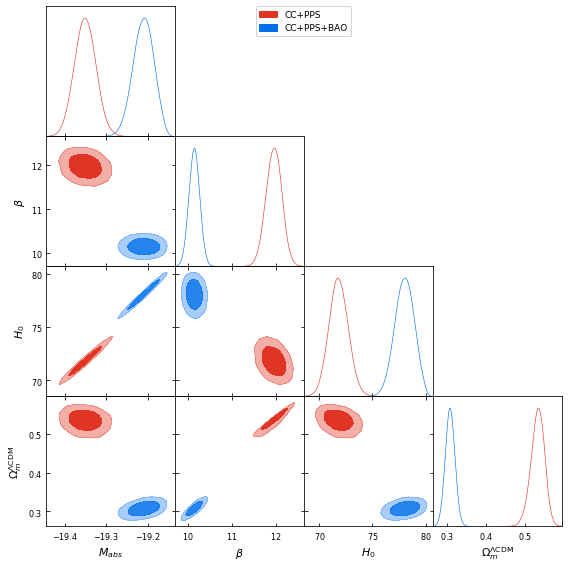

In [9]:
labels = [r'$M_{abs}$',r'$\beta$',r'$H_{0}$',r'$\Omega_m^{\rm \Lambda CDM}$']
names = [i.replace('$','') for i in labels]; 



filename_1 = home_directory+'/Documents/Repos/GILA-output/L=0.85/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params'
filename_2 = home_directory+'/Documents/Repos/GILA-output/L=0.85/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params'

with np.load(filename_1 + '_deriv.npz') as data:
    samples_1 = data['new_samples']

with np.load(filename_2 + '_deriv.npz') as data:
    samples_2 = data['new_samples']

samps_1 = MCSamples(samples = samples_1,names=names,labels=names)
samps_2 = MCSamples(samples = samples_2,names=names,labels=names)

samps_1 = samps_1.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
            settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
            'smooth_scale_1D':0.3})

samps_2 = samps_2.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
            settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
            'smooth_scale_1D':0.3})


print(samps_1, samps_2)
print(type(samps_1))
g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=0.85.pdf')

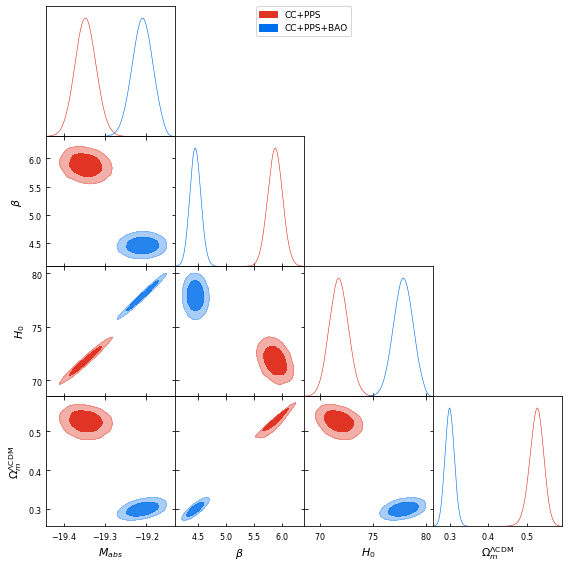

In [10]:
labels = [r'$M_{abs}$',r'$\beta$',r'$H_{0}$',r'$\Omega_m^{\rm \Lambda CDM}$']
names = [i.replace('$','') for i in labels]; 



filename_1 = home_directory+'/Documents/Repos/GILA-output/L=0.90/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params'
filename_2 = home_directory+'/Documents/Repos/GILA-output/L=0.90/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params'

with np.load(filename_1 + '_deriv.npz') as data:
    samples_1 = data['new_samples']

with np.load(filename_2 + '_deriv.npz') as data:
    samples_2 = data['new_samples']

samps_1 = MCSamples(samples = samples_1,names=names,labels=names)
samps_2 = MCSamples(samples = samples_2,names=names,labels=names)

samps_1 = samps_1.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
            settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
            'smooth_scale_1D':0.3})

samps_2 = samps_2.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
            settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
            'smooth_scale_1D':0.3})


g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=0.90.pdf')

<getdist.mcsamples.MCSamples object at 0x7fd196a61f10> <getdist.mcsamples.MCSamples object at 0x7fd187d6eb50>
<class 'getdist.mcsamples.MCSamples'>


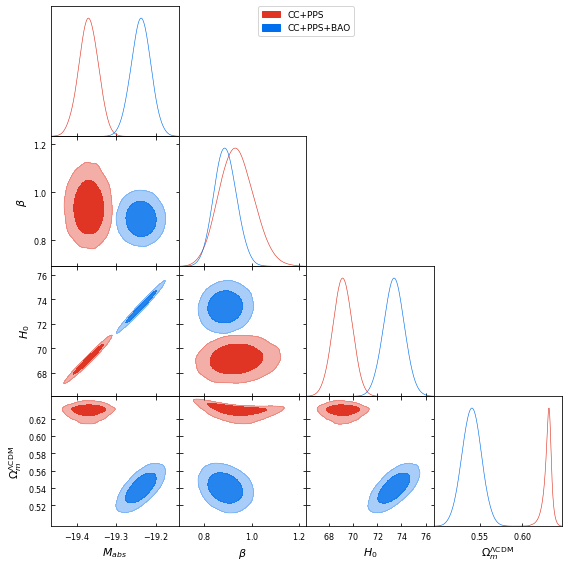

In [11]:
labels = [r'$M_{abs}$',r'$\beta$',r'$H_{0}$',r'$\Omega_m^{\rm \Lambda CDM}$']
names = [i.replace('$','') for i in labels]; 



filename_1 = home_directory+'/Documents/Repos/GILA-output/L=1.00/sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params'
filename_2 = home_directory+'/Documents/Repos/GILA-output/L=1.00/sample_GILA_PPS_CC_BAO_4params/sample_GILA_PPS_CC_BAO_4params'

with np.load(filename_1 + '_deriv.npz') as data:
    samples_1 = data['new_samples']

with np.load(filename_2 + '_deriv.npz') as data:
    samples_2 = data['new_samples']

samps_1 = MCSamples(samples = samples_1,names=names,labels=names)
samps_2 = MCSamples(samples = samples_2,names=names,labels=names)

samps_1 = samps_1.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
            settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
            'smooth_scale_1D':0.3})

samps_2 = samps_2.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
            settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
            'smooth_scale_1D':0.3})

print(samps_1, samps_2)
print(type(samps_1))
g = plots.get_subplot_plotter()
g.triangle_plot([samps_1, samps_2], filled=True,param_names=names, legend_labels=['CC+PPS','CC+PPS+BAO'])
plt.savefig('./L=1.00.pdf')